# **Machine Learning Project (CSPE21)**
> Name : V. Subhash
<br/>
> Roll No: CSE18U028


## Customer Segmentation With KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# menghapus kolom
df = df.drop(columns=(['CustomerID', 'Genre']))

In [4]:
# mengubah nama kolom
df = df.rename(columns={
    'Age' : 'age', 
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

In [5]:
X = df
X

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [6]:
from sklearn.cluster import KMeans

In [7]:
cluster = []
for k in range (1, 11):
    kmean = KMeans(n_clusters=k).fit(X)
    cluster.append(kmean.inertia_)

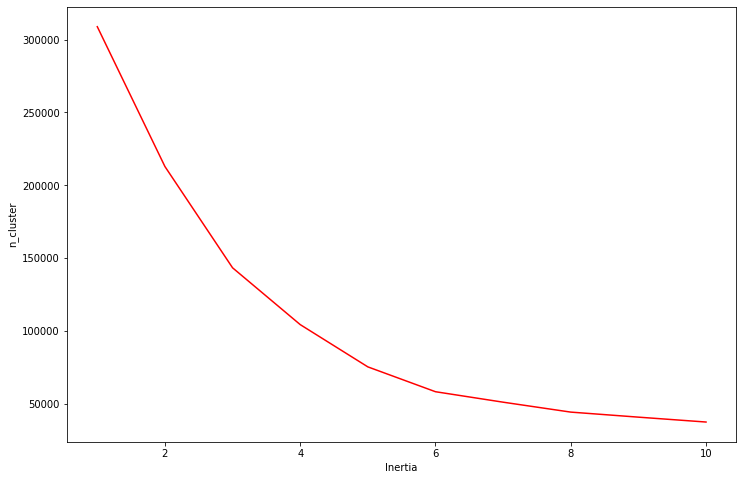

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), cluster, 'r-')
plt.xlabel('Inertia')
plt.ylabel('n_cluster')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


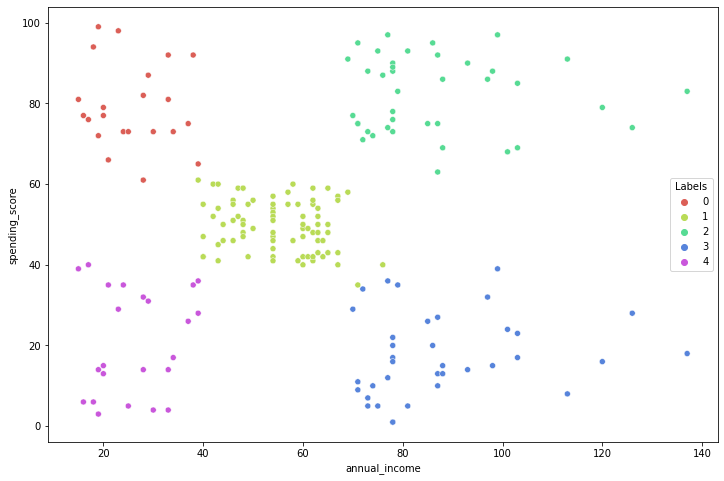

In [9]:
km = KMeans(n_clusters=5).fit(X)

# menambah kolom baru pada datasets
X['Labels'] = km.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.show()